## <span style="color:blue;">Step 1: Importing the necessary libraries.</span>

In [23]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<span style="color:blue;">Note: I import warning and create an 'ignore' action toward 'FutureWarning' that can be ignorable.</span>

## <span style="color:blue;">Step 2: loading the dataset.</span>

## <span style="color:blue;">I got this dataset from Kaggle website:</span>
https://www.kaggle.com/datasets/altavish/boston-housing-dataset/data?select=HousingData.csv

<span style="color:blue;">**The dataset I utilized to complete lab 05 didn't contain any missing values. However, upon comparing it with the dataset available on the Kaggle website, I noticed the Kaggle dataset did have missing values. This led me to consider that the Kaggle dataset might be the accurate or intended one.**</span>

<span style="color:blue;">Additionally, I gathered the following details regarding the column names from the Kaggle website, which I provided the link to above:</span>

    CRIM : The average rate of crime per person in the town.
    ZN : The percentage of land designated for large residential lots.
    INDUS : The percentage of land used for non-retail businesses.
    CHAS : A binary variable indicating whether the tract bounds the Charles River (1 if yes, 0 otherwise).
    NOX : The concentration of nitric oxides in the air, measured in parts per 10 million.
    RM : The average number of rooms in houses in the town.
    AGE : The percentage of houses that were built before 1940 and are owner-occupied.
    DIS : The weighted average distance to employment centers in Boston.
    RAD : An index indicating accessibility to radial highways.
    TAX : The property-tax rate for a full-value property, per $10,000.
    PTRATIO : The ratio of pupils to teachers in the town.
    B : A measure influenced by the proportion of Black residents in the town.
    LSTAT : The percentage of the population with lower socioeconomic status.
    MEDV : The median value of homes that are owner-occupied, measured in thousands of dollars.

In [3]:
bost_hous = pd.read_csv("HousingData.csv")
bost_hous

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## <span style="color:blue;">Step 3: Preprocessing and Cleaning data before next steps:</span>

### <span style="color:blue;">Step 3-1: Summary</span>

In [4]:
bost_hous.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<span style="color:blue;">**Interpretation: I utilized the describe() function to generate a statistical summary for the Boston housing data. In this table, I observe various statistical measures such as mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum for each feature.**</span>

### <span style="color:blue;">Step 3-2: Missing Values</span>

In [5]:
bost_hous.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
bost_hous.dropna(inplace=True)
bost_hous.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<span style="color:blue;">**Interpretation: I got the missing values and then I drop those missing values, so in the above you can see that I handle those missing values.**</span>

### <span style="color:blue;">Step 3-3: Outliers</span>

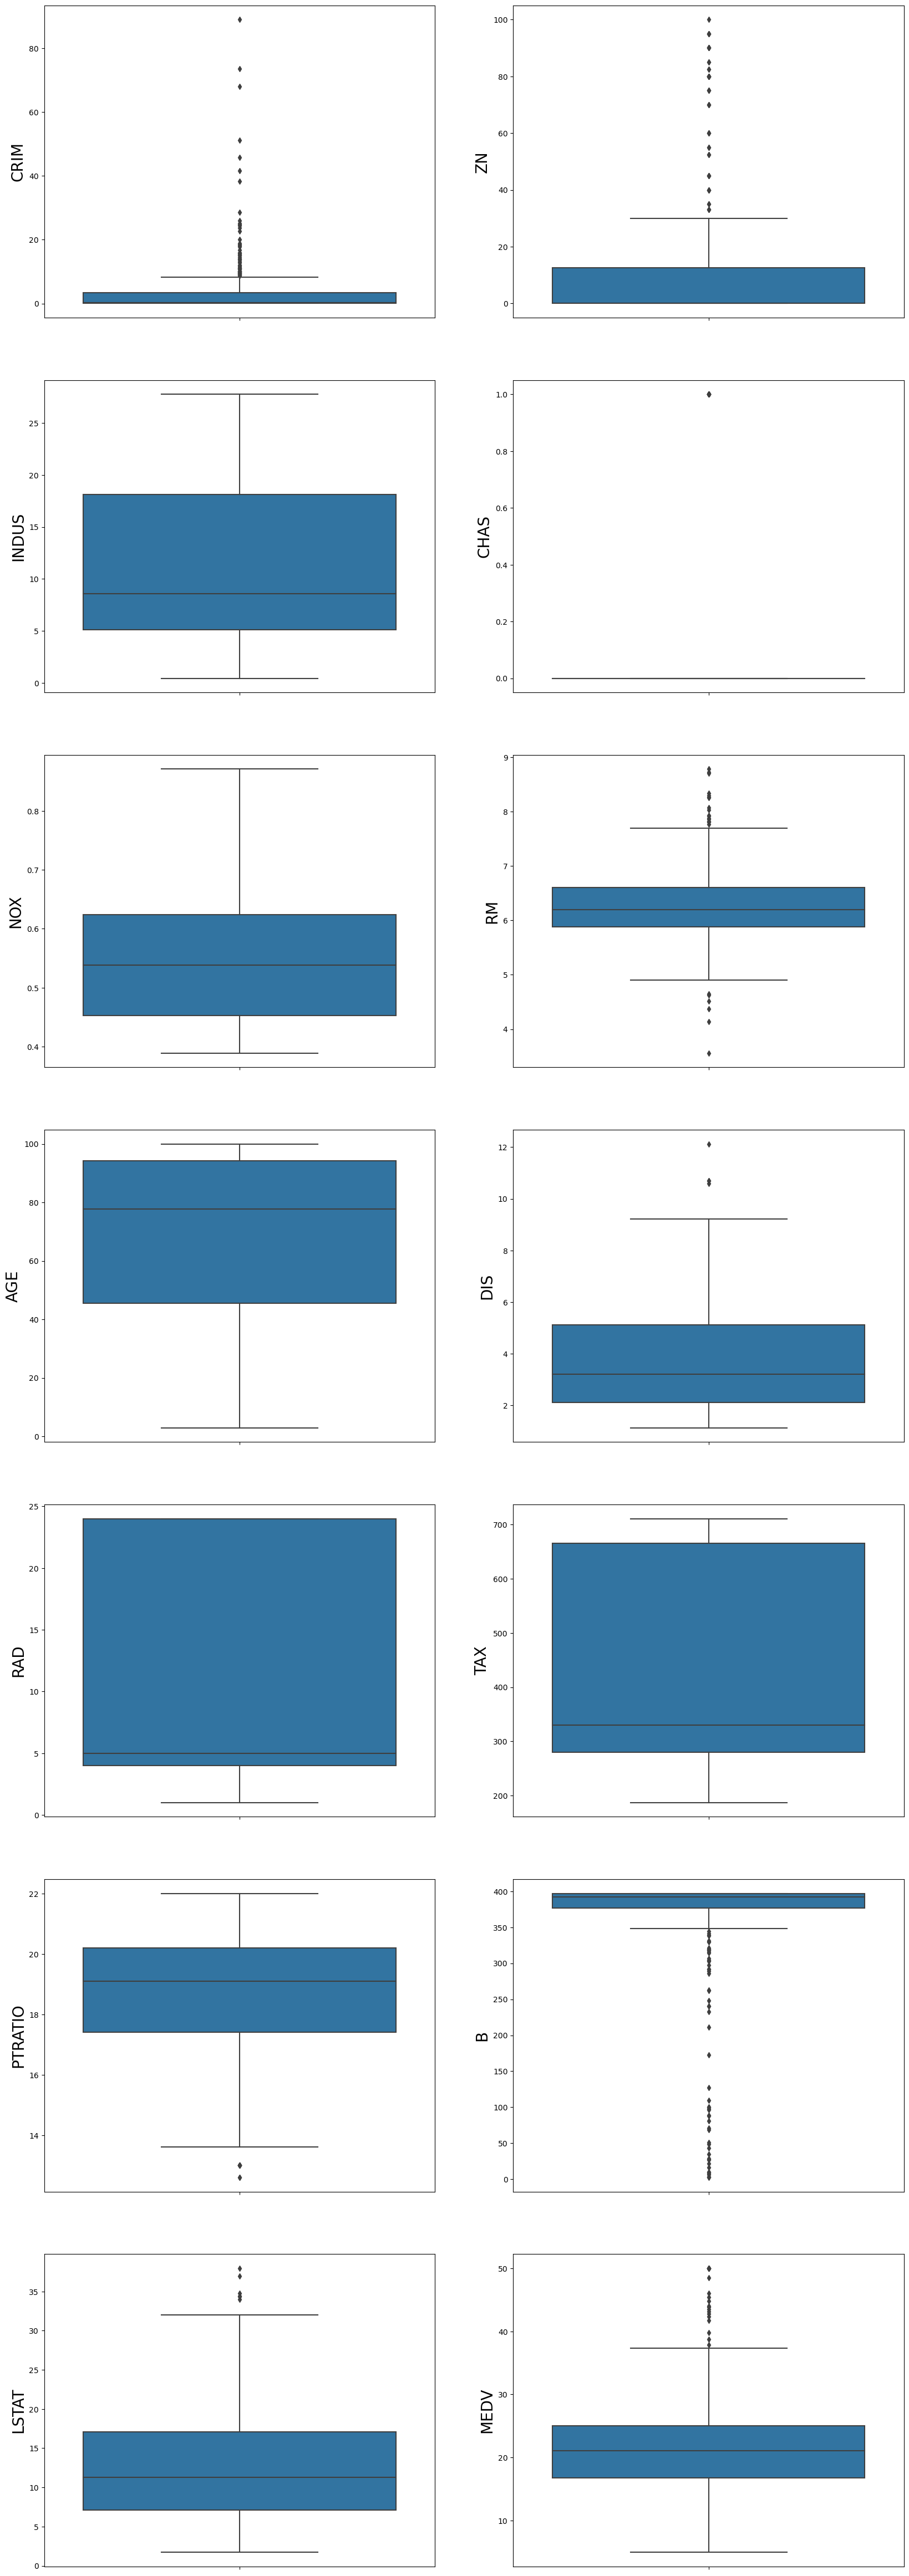

In [7]:
plt.show()
fig, axs = plt.subplots(ncols=2, nrows=7, figsize=(20, 60))
index = 0
axs = axs.flatten()
for a,b in bost_hous.items():
    ax = sns.boxplot(y=a, data=bost_hous, ax=axs[index])
    ax.set_ylabel(a, fontsize=20)
    index += 1
plt.show()

<span style="color:blue;">**Interpretaion: The columns of CRIM, ZN, RM, and B seem to display outliers. So now I must investigate the percentage of outliers within each of these columns.**</span>

In [8]:
# I commented the necessary library for my own record, I know that I already imprted all libraries in the begining.
# from scipy import stats

for a, b in bost_hous.items():
    q1 = b.quantile(0.25)
    q3 = b.quantile(0.75)
    irq = q3 - q1
    col = b[(b <= q1 - 1.5 * irq) | (b >= q3 + 1.5 * irq)]
    perc = np.shape(col)[0] * 100.0 / np.shape(bost_hous)[0]
    print(f"Oulier of column {a} is {round(perc, 2)}%")

Oulier of column CRIM is 13.71%
Oulier of column ZN is 12.69%
Oulier of column INDUS is 0.0%
Oulier of column CHAS is 100.0%
Oulier of column NOX is 0.0%
Oulier of column RM is 5.84%
Oulier of column AGE is 0.0%
Oulier of column DIS is 1.02%
Oulier of column RAD is 0.0%
Oulier of column TAX is 0.0%
Oulier of column PTRATIO is 3.05%
Oulier of column B is 14.72%
Oulier of column LSTAT is 1.52%
Oulier of column MEDV is 6.85%


<span style="color:blue;">**Interpretaion: In the above you can see the percentage of ouliers that are exist in each columns, now in the following I will remove these outliers before visualizaion, because I dont want my visualizions contain these outliers.**</span>

In [9]:
# deleting these outliers before visualization
bost_hous = bost_hous[~(bost_hous['MEDV'] >= 50.0)]
print(np.shape(bost_hous))

(382, 14)


## <span style="color:blue;">Step 4: Visualizaion.</span>

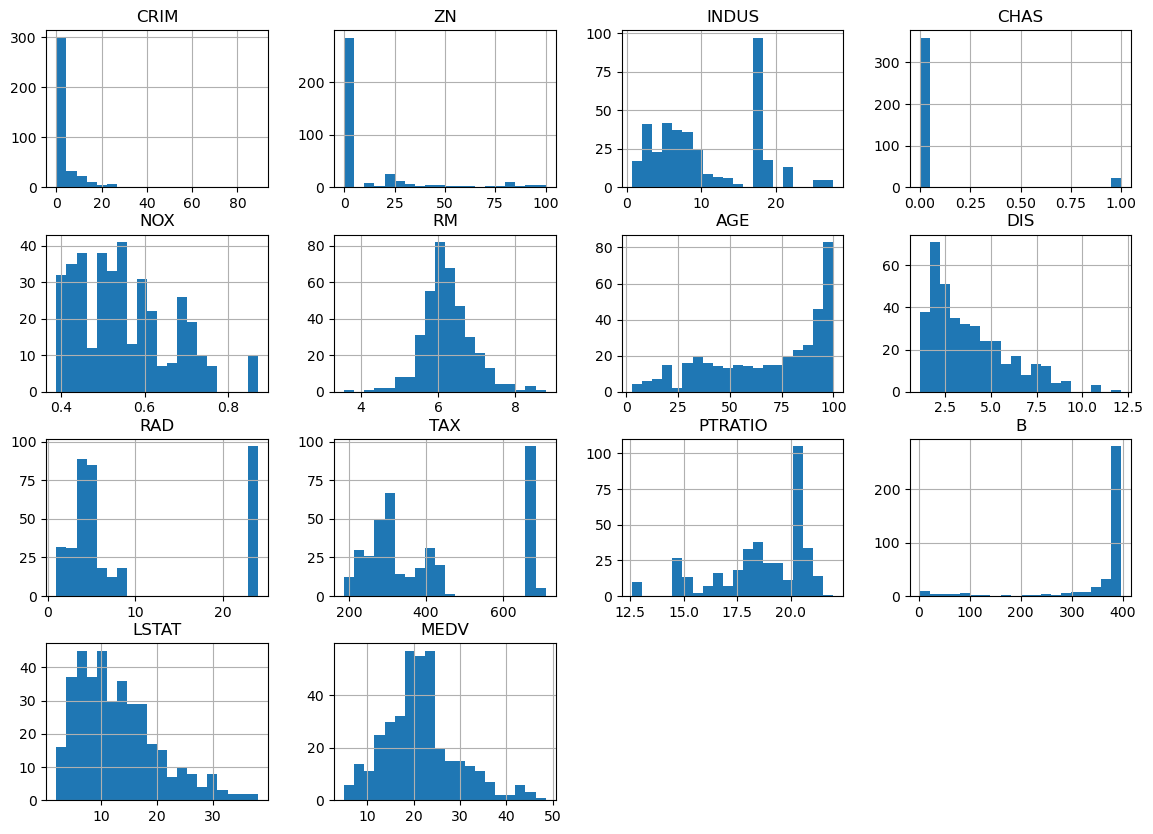

In [10]:
# showing the histogram for different columns
bost_hous.hist(bins=20, figsize=(14, 10))
plt.show()

<span style="color:blue;">**Interpretaion: From these histograms, I learned that the percentage of crime tends to be low, but it exhibits a high right-sided skewness in the CRIM column. Additionally, there is skewness in the ZN column. In the CHAS column, we observe unbalanced data, favoring areas not bordering the Charles River. The RM column displays an almost bell-shaped histogram, indicating a normal distribution, suggesting that the average number of rooms follows a normal pattern. The AGE column, representing the percentage of houses built before 1940 and owner-occupied, is skewed to the left, suggesting that most houses built before 1940 are owner-occupied. In the DIS column, there is right-sided skewness, indicating that houses are more concentrated as we get closer to employment centers. Regarding the MEDV column, we can see that the majority of owner-occupied houses are valued at more than 600 thousand dollars.**</span>

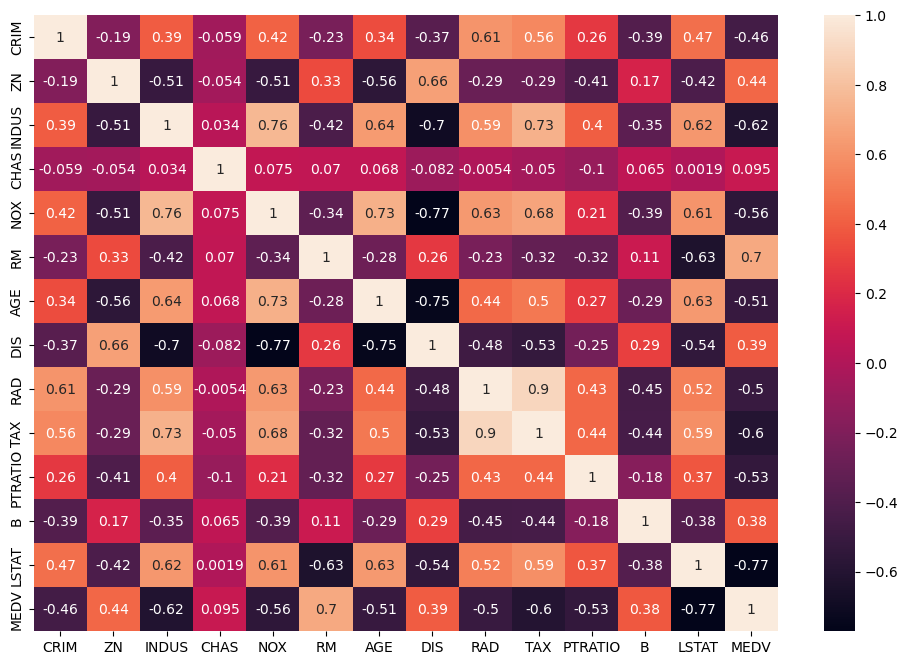

In [11]:
import seaborn as sns
# here I calculate the corrleaions between attributes
corr_mat = bost_hous.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, annot=True)
plt.show()

<span style="color:blue;">**Interpretaion: here I will collected all those correlations tha are storng.**<br>
    INDUS - proportion of non-retail business acres per town. +0.62<br>
    NOX - nitric oxides concentration (parts per 10 million)  -0.56<br>
    RM - average number of rooms per dwelling                 +0.70<br>
    AGE - propor of owner-occupied units built prior to 1940  -0.51<br>
    RAD - index of accessibility to radial highways           -0.50<br>
    TAX - full-value property-tax rate per 10,000 dollars     -0.60<br>
    PTRATIO - pupil-teacher ratio by town                     -0.53<br>
    LSTAT - % lower status of the population                  -0.77</span>


<span style="color:blue;">**In the following I will show scatterplots of those features that have the columns with correlation &gt;= 0.5 or &lt;= -0.5 with target value that is MEDV - Median value of owner-occupied homes in 1000s dollars, those that are very close to 1 or -1.**</span>

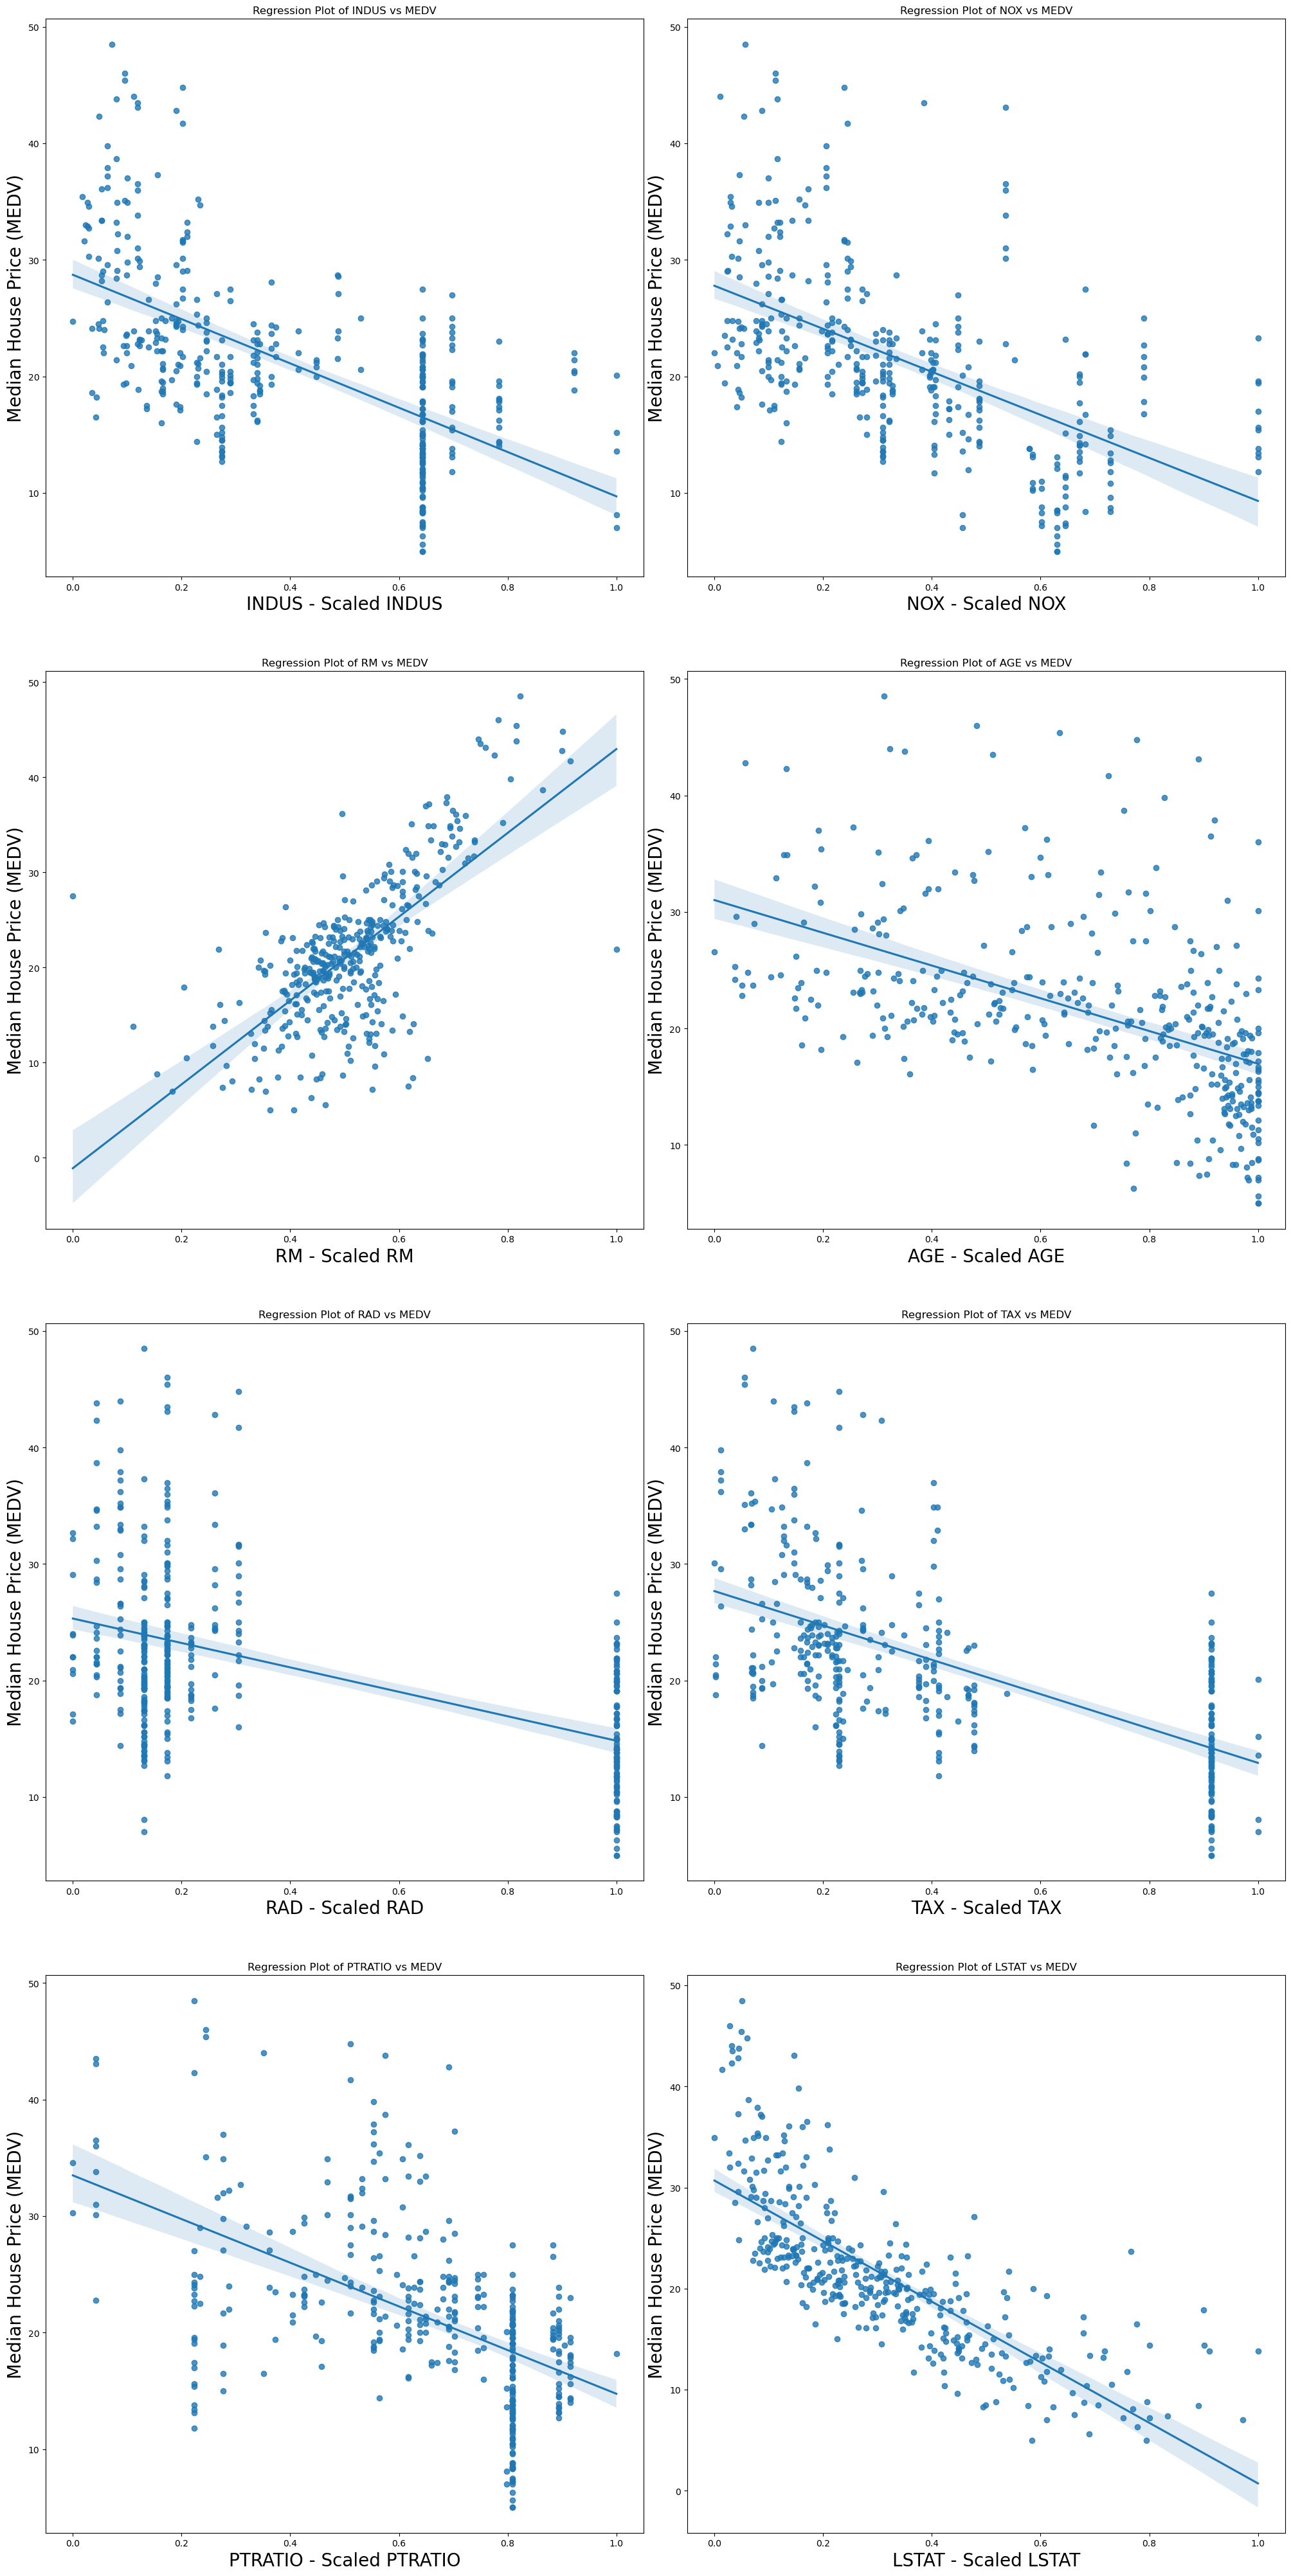

In [12]:
# commenting the library for my own learning perpuses
# from sklearn import preprocessing

# put all columns wih correlation >= 0.5 or <= -0.5 with 'MEDV' to a list
high_corr_cols = ['INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

# getting a copy of dataframe and then 
# using hte min max scaler funtion to scaling above listed column
scaled_bost_hous = bost_hous.copy()
minmax = preprocessing.MinMaxScaler()
scaled_bost_hous[high_corr_cols] = minmax.fit_transform(scaled_bost_hous[high_corr_cols])

fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 40))
axs = axs.flatten()

for i, col in enumerate(high_corr_cols):
    ax = sns.regplot(x=col, y='MEDV', data=scaled_bost_hous, ax=axs[i])
    ax.set_xlabel(i, fontsize=20)
    ax.set_ylabel(i, fontsize=20) 
    axs[i].set_xlabel(f'{col} - Scaled {bost_hous[col].name}')
    axs[i].set_ylabel('Median House Price (MEDV)')
    axs[i].set_title(f'Regression Plot of {col} vs MEDV')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()



<span style="color:blue;">**Based on the above scatterplots we have a lot of skewness in some columns, so first and before starting to create predictive models, we should remove the skewness.**</span>


In [13]:
skew_threshold = 0.3

# first I Log-transform the target variable 'MEDV'
scaled_bost_hous['MEDV'] = np.log1p(scaled_bost_hous['MEDV'])

# and then Log-transform features with skewness greater than the threshold
for col in high_corr_cols:
    if np.abs(scaled_bost_hous[col].skew()) > skew_threshold:
        scaled_bost_hous[col] = np.log1p(scaled_bost_hous[col])


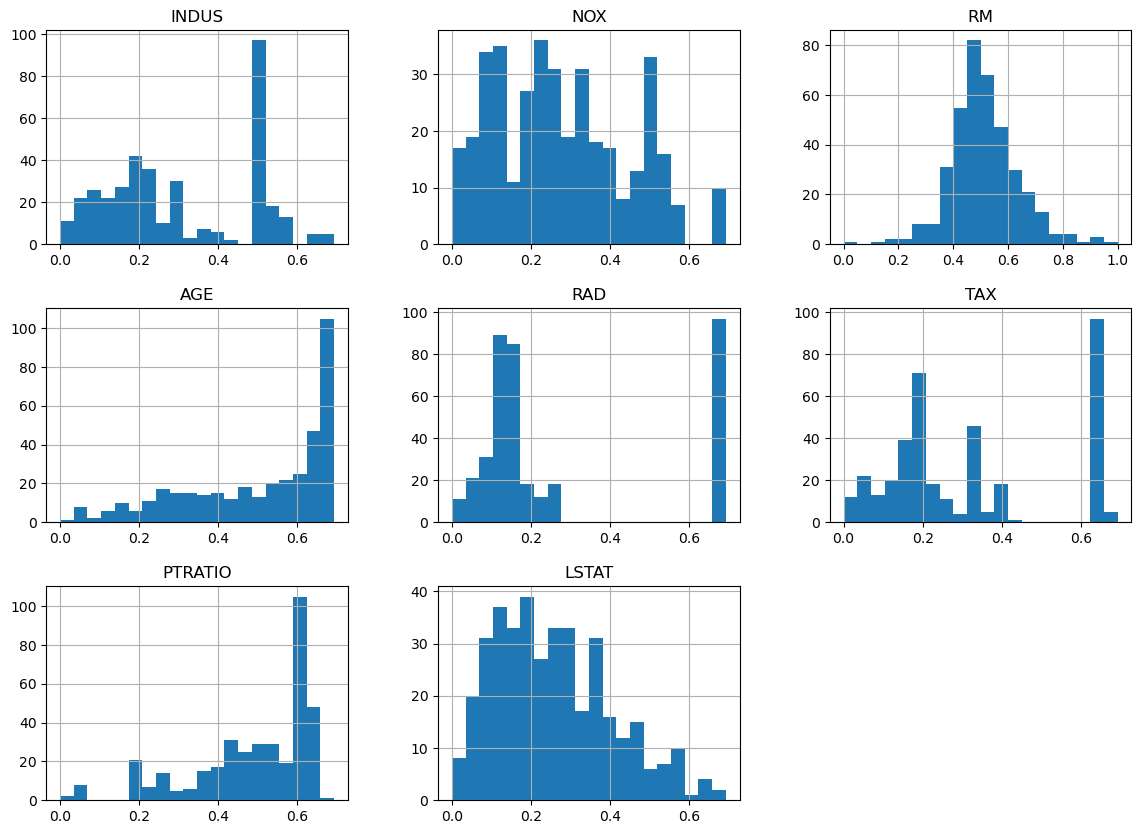

In [14]:
# now I am showing the histogram for new non-skewed columns
scaled_bost_hous[high_corr_cols].hist(bins=20, figsize=(14, 10))
plt.show()


<span style="color:blue;">**As you can see the skewness our high correlated columns are removed.**</span>

## <span style="color:blue;">Step 5: Split the data into training and testing datasets</span>

<span style="color:blue;">**In this step I will assign the independent variables as X and dependent or Target value as y. and then I will do the train test split for prediction.**</span>

In [15]:
X = bost_hous.drop("MEDV", axis=1)  # independent variables
y = bost_hous["MEDV"]  # dependent variable

# Split the data into train 80% and test 20% 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)


## <span style="color:blue;">Step 6: Create the Regression Tree with Best complexity parameter (often referred to as hyperparameter tuning)</span></span>

<span style="color:blue;">**To find the best settings for our decision tree model, which make it predict better, we can change some values in the model. These values are often called "hyperparameters." In scikit-learn, the important hyperparameter for a decision tree is usually the depth of the tree or the minimum number of examples needed to make a decision.<br><br>
Here's how we can do it:<br>
    - Decide on a range of values to try for these hyperparameters. For instance, we can try different values for the depth of the tree.<br>
    - Use a method called cross-validation to test how well our model works with these different hyperparameter values. It's like trying out the model with different settings to see how well it does. We can measure its performance by a number called RMSE.<br>
    - We can split our training data into smaller groups and try your model with different hyperparameter values for each group. This helps us make sure our model is working well in different situations.<br>
    - Finally, we pick the hyperparameters that give us the lowest RMSE from all the testing. These are the best settings for our model.<br><br>
To find the best complexity parameter for your Decision Tree model, you can perform a grid search over a range of complexity parameter values and evaluate their performance using cross-validation.<br>
In the following codes, I am testing different depth values with 5-fold cross-validation to find the depth that gives the lowest RMSE. This is how we can find the best hyperparameters for our decision tree model.<br>
Source link: https://www.section.io/engineering-education/hyperparmeter-tuning/**</span>


In [16]:
# commenting the library for my own learning purposes
# from sklearn.model_selection import cross_val_score

# choosing a range for maximum depth values
max_dep = [3, 4, 5, 6, 7, 8, 9, 10]

best_max_dep = None # assign a variable to tracking the best hyperparmeter
best_rmse = float('inf') # assign a variable to tracking the lowest RMSE

# repeating inside of maximum depth values
for max_depth in max_dep:
    # here it creats a Decision Tree Regressor with the maximum depth possible
    reg_tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    
    # here I use cross validation in order to computing the RMSE
    rmse = np.sqrt(-cross_val_score(reg_tree, X_train, y_train, cv=5, scoring="neg_mean_squared_error"))
    
    # now here it calculate mean of RMSE in maximum depth variable
    mean_rmse = rmse.mean()
    
    # here we will update our initialized variables
    if mean_rmse < best_rmse:
        best_max_dep = max_depth
        best_rmse = mean_rmse

# Now we have the best max_depth value, and we can build our best model with it
best_reg_tree = DecisionTreeRegressor(max_depth=best_max_dep, random_state=42)
best_reg_tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=7, random_state=42)

<span style="color:blue;">**Saving the decision tree in a dot file and then opening it here to show it.**</span>

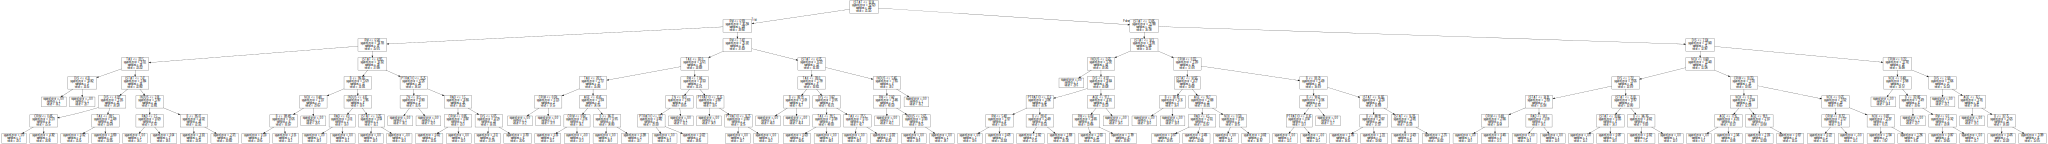

In [17]:
export_graphviz(best_reg_tree, 
                out_file = "best_reg_tree.dot", 
                feature_names = X_train.columns)

with open("best_reg_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

<span style="color:blue;">**Threshold**: The decision criterion is "LSTAT &lt;= 10.14," meaning that if the value of the feature "LSTAT" for a given data point is less than or equal to 10.14, the left branch is followed; otherwise, the right branch is taken.<br><br>
The node's statistics are as follows:<br>
**Squared Error**: The squared error associated with the predictions made at this node is 62.623.<br>
**Samples**: There are 305 samples (data points) that reach this node.<br>
**Value**: The predicted value for the target variable (presumably MEDV - Median value of owner-occupied homes in 1000s dollars) at this node is 21.525.<br><br>
**Interpretation:**<br>
This decision node suggests that when the percentage of lower-status population (LSTAT) is less than or equal to 10.14, the predicted median value of owner-occupied homes (MEDV) is approximately 21.525, based on a dataset of 305 samples. The squared error of the predictions at this node is 62.623. The decision tree is essentially making predictions based on this feature and threshold combination at this point in the tree.</span>



## <span style="color:blue;">Step 7: Test Set Evaluation:</span>

In [18]:
# commenting the library for my own learning purpuse
# from sklearn.metrics import mean_squared_error

# Here I am going to make a predcition on test dataset. 
y_pred_test = best_reg_tree.predict(X_test)

# and then evaluating the prediction with RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", test_rmse)

Test RMSE: 3.6553993280865678


<span style="color:blue;">**Test RMSE (Root Mean Squared Error):** The value of 3.655 indicates the square root of the average squared differences between the actual values (y_test) and the predicted values (y_pred_test) on the test dataset. In the context of regression models, the RMSE is a measure of how well the model's predictions match the actual values.<br><br>
**Interpretation:** A lower RMSE value is desirable, as it indicates that the model's predictions are, on average, closer to the true values in the test dataset. In this case, the Test RMSE of 3.655 suggests that, on average, the predictions made by the regression tree model are off by approximately 3.655 units (in the same unit as the target variable).<br><br>
In summary, the lower the Test RMSE, the better the model is at making accurate predictions on the test dataset. It's a common metric used to assess the performance of regression models.</span>

## <span style="color:blue;">Step 8: Visualization of prediction and calculating The R Squared</span>

13.36194424777573

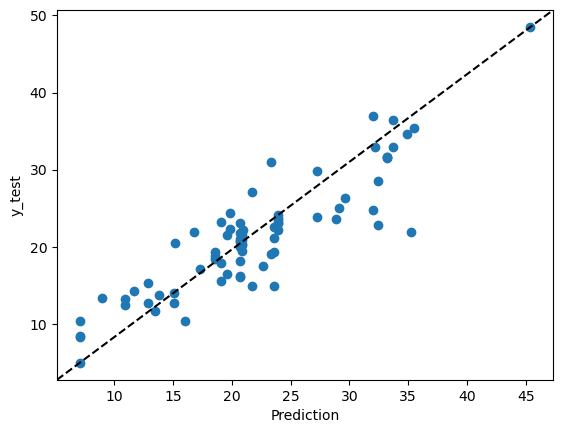

In [19]:
pred = best_reg_tree.predict(X_test)

plt.scatter(pred, 
            y_test, 
            label = 'MEDV')

plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('Prediction')
plt.ylabel('y_test')

mean_squared_error(y_test, pred)

<span style="color:blue;">**Interpretation: The test model's error, known as Mean Squared Error (MSE), is 13.3. When we take the square root of this error (which is what Root Mean Squared Error or RMSE does), it's about 3.64. This means that, on average, the model's predictions on the test data are usually around $$3,640 off from the actual median home value in the neighborhood. In other words, the RMSE gives us a sense of how much the model tends to be wrong in predicting the home values, and in this case, it's approximately $3,640.**</span>

## <span style="color:blue;">Step 9: Random Forest Regressor</span>

In [20]:
# commenting the library for my own learning purpuses
# from sklearn.ensemble import RandomForestRegressor

# making a random forest  
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# now fitting the model to the training data
random_forest_regressor.fit(X_train, y_train)

# doing the predictions on the test dataset
y_pred_rf = random_forest_regressor.predict(X_test)

# and in the end calculating the RMSE for this random forest method.
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("This Random Forest RMSE is:", test_rmse_rf)


This Random Forest RMSE is: 3.5289146596828687


<span style="color:blue;">**Interpretation: The RMSE of 3.528 suggests that, on average, the Random Forest Regressor's predictions on the test data are approximately $3,528 off from the actual values, that it is slightly better than our decision tree model RMSE in prvious evaluation. Lower RMSE values generally indicate better model performance.**</span>

## <span style="color:blue;">Step 10: Bagging with Decision tree method</span>

In [21]:
# commenting the library for my own learning purpuses
# from sklearn.ensemble import BaggingRegressor

# I assign base regressor for our bagging with Decision Tree Regressor
base_regressor = DecisionTreeRegressor(random_state=42)
bagging_regressor = BaggingRegressor(base_regressor, n_estimators=100, random_state=42)

# fitting the model
bagging_regressor.fit(X_train, y_train)

# predictions on test data
y_pred_bagging = bagging_regressor.predict(X_test)

# RMSE
test_rmse_bagging = np.sqrt(mean_squared_error(y_test, y_pred_bagging))
print("Bagging RMSE:", test_rmse_bagging)

Bagging RMSE: 3.5060724890825172


<span style="color:blue;">**Interpretation: The RMSE of 3.506 suggests that, on average, the bagging's predictions on the test data are approximately $3,506 off from the actual values, that it is slightly better than our Random Forest RMSE in prvious evaluation. Lower RMSE values generally indicate better model performance.**</span>

## <span style="color:blue;">Step 11: AdaBoost method</span>

In [22]:
# commenting the library for my own learning purpuses
# from sklearn.ensemble import AdaBoostRegressor

# Creating an AdaBoost Regressor with the base of Decision Trees
adaboost_regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=best_max_dep, random_state=42), n_estimators=100, random_state=42)

# Fiting AdaBoost on the training data
adaboost_regressor.fit(X_train, y_train)

# predictions on test data
y_pred_adaboost = adaboost_regressor.predict(X_test)

# RMSE
test_rmse_adaboost = np.sqrt(mean_squared_error(y_test, y_pred_adaboost))
print("AdaBoost Test RMSE:", test_rmse_adaboost)

AdaBoost Test RMSE: 3.5008428278030634


<span style="color:blue;">**Interpretation: The RMSE of 3.500 suggests that, on average, the AdaBoost's predictions on the test data are approximately $3,500 off from the actual values, that it is slightly better than our Bagging RMSE in prvious evaluation. Lower RMSE values generally indicate better model performance.**</span>

## <span style="color:blue;">Step 12: Plot RMSE vs. Different Values of CP (Complexity Parameter) for Decision tree</span>

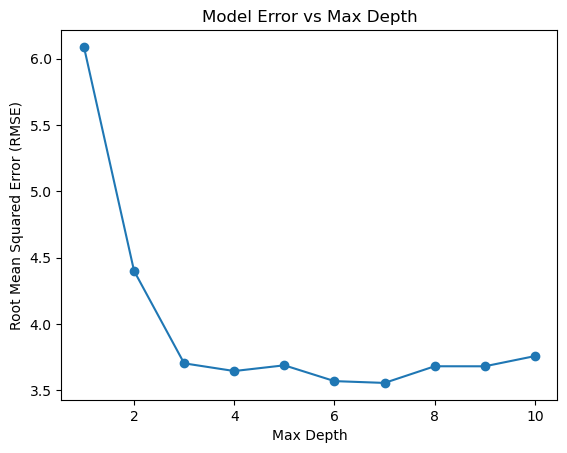

Best Max Depth: 7
Best RMSE: 3.5551264816178447


In [26]:
# assigning a range of values for the complexity parameter (max depth)
max_dep_range = range(1, 11)

# assigning variables to track the best hyperparameter and RMSE
best_hyperpara = None
best_rmse = float('inf')

# put RMSE values in a list for plotting
rmse_values = []

# repeating over different values of max depth
for max_depth in max_dep_range:
    # make Decision Tree Regressor with the current max depth
    reg_tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    
    # with using cross-validation we will compute RMSE
    rmse = np.sqrt(-cross_val_score(reg_tree, X_train, y_train, cv=5, scoring="neg_mean_squared_error"))
    
    # Calculate mean RMSE
    mean_rmse = rmse.mean()
    
    # Updating best hyperparameter and RMSE if current result is better
    if mean_rmse < best_rmse:
        best_hyperpara = max_depth
        best_rmse = mean_rmse
    
    # listing the RMSE values for plotting
    rmse_values.append(mean_rmse)

# sketching a plot model or error vs different values of hyperparameter
plt.plot(max_dep_range, rmse_values, marker='o')
plt.title('Model Error vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.show()

# printin the best tuning parameter (complexity parameter) and its corresponding RMSE
print("Best Max Depth:", best_hyperpara)
print("Best RMSE:", best_rmse)


# <span style="color:blue;">Step 13: Plot The Final Decision Tree Model</span>

Test RMSE with Best Max Depth: 3.6553993280865678


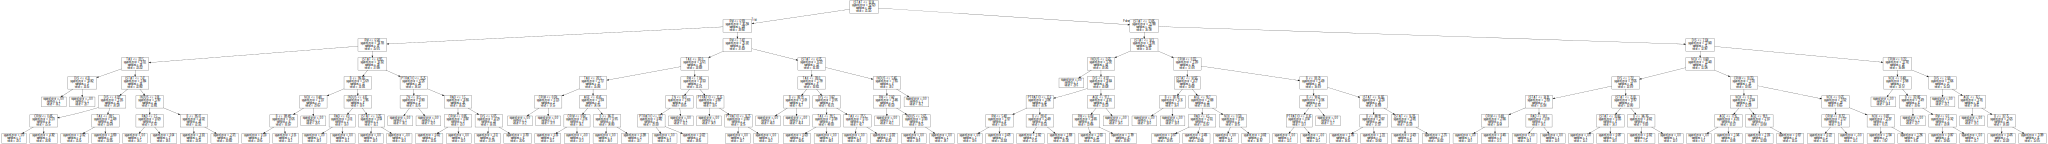

In [27]:
# plotting the Decision Tree Regressor with the best hyperparaneter
final_reg_tree = DecisionTreeRegressor(max_depth=best_hyperpara, random_state=42)

# Fiting the model to training dataset
final_reg_tree.fit(X_train, y_train)

# predictions on the test dataset
y_pred_test = final_reg_tree.predict(X_test)

# RMSE of thos model
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE with Best Max Depth:", test_rmse)

export_graphviz(final_reg_tree, 
                out_file = "final_reg_tree.dot", 
                feature_names = X_train.columns)

with open("final_reg_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## <span style="color:blue;">Step 14: Plot RMSE vs. Different Values of CP (Complexity Parameter) for AdaBoost</span>

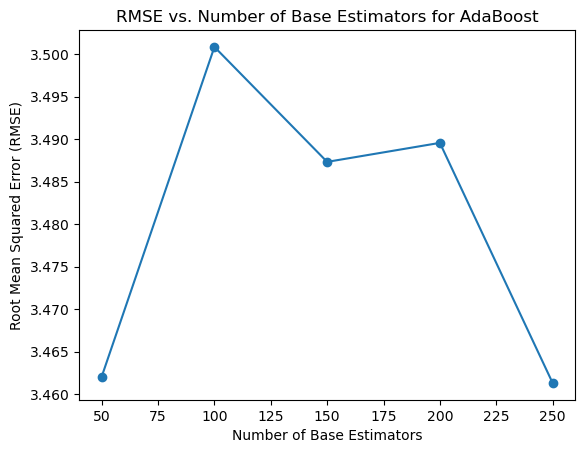

Best Number of Base Estimators: 250
Best AdaBoost RMSE: 3.4613064056500455


In [28]:
# range of complexity parameter (number of base estimators)
n_estimators_range = [50, 100, 150, 200, 250]

# variables to track best hyperparameter and RMSE
best_n_estimators = None
best_rmse_adaboost = float('inf')

# Lists RMSEfor plotting
rmse_values_adaboost = []

# for loop n_estimators
for n_estimators in n_estimators_range:
    adaboost_regressor = AdaBoostRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=best_hyperpara, random_state=42),
        n_estimators=n_estimators,
        random_state=42
    )
    
    # Fit model to training data
    adaboost_regressor.fit(X_train, y_train)
    
    # predictions on test dataset
    y_pred_adaboost = adaboost_regressor.predict(X_test)
    
    # Calculate RMSE
    rmse_adaboost = np.sqrt(mean_squared_error(y_test, y_pred_adaboost))
    
    # Updating best hyperpara and RMSE
    if rmse_adaboost < best_rmse_adaboost:
        best_n_estimators = n_estimators
        best_rmse_adaboost = rmse_adaboost
    
    # listing the RMSE for plotting
    rmse_values_adaboost.append(rmse_adaboost)

# Plot RMSE vs. complexity parameters
plt.plot(n_estimators_range, rmse_values_adaboost, marker='o')
plt.title('RMSE vs. Number of Base Estimators for AdaBoost')
plt.xlabel('Number of Base Estimators')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.show()

# showing the best tuning parameter (number of base estimators) and the corresponding RMSE
print("Best Number of Base Estimators:", best_n_estimators)
print("Best AdaBoost RMSE:", best_rmse_adaboost)
